/Users/tree/Projects/food-spoilage-poc/src/pipelines/build_dataset.py:20: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X["day"] = pd.to_datetime(X["day"]).view("int64") // 86_400_000_000_000  # days since epoch


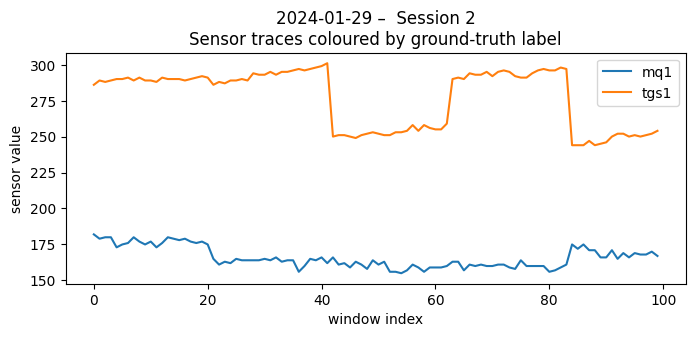

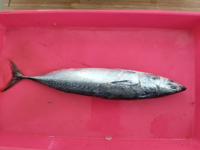

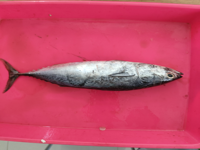

In [5]:
# --- setup & load -------------------------------------------------------
import pandas as pd, matplotlib.pyplot as plt, pathlib, os, sys

# make sure repo root is on sys.path
repo_root = (
    pathlib.Path.cwd().parent     # running from /notebooks
    if pathlib.Path.cwd().name == "notebooks"
    else pathlib.Path.cwd()       # running from repo root
)
os.chdir(repo_root)
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

from src.pipelines.build_dataset import load_dataset_split

# ----- pick a sample test slice ----------------------------------------
X_tr, y_tr, X_te, y_te = load_dataset_split("dafif")      # your helper
sample = X_te.iloc[:100].reset_index(drop=True)           # first 100 rows

# convert ordinal day → calendar date string *just for display*
ordinal_day = sample.day.iloc[0]                          # e.g. 19751
date_str    = pd.to_datetime(ordinal_day, unit="D",
                             origin="unix"                # 1970-01-01
                       ).strftime("%Y-%m-%d")
sess        = sample.session.iloc[0]

# --- plot the trace ----------------------------------------------------
fig, ax = plt.subplots(figsize=(8,3))
sample.plot(y=["mq1","tgs1"], ax=ax)
ax.set_xlabel("window index")
ax.set_ylabel("sensor value")
ax.set_title(f"{date_str} –  Session {sess}\n"
             "Sensor traces coloured by ground-truth label")
plt.show()

# --- optionally colour by label ----------------------------------------
#   (uncomment if you want red/blue markers)
"""
colors = sample.index.map(lambda i: 'tab:red' if y_te.iloc[i] else 'tab:blue')
for col in ["mq1","tgs1"]:
    ax.scatter(sample.index, sample[col], c=colors, s=10, alpha=0.6)
fig
"""

# --- show a couple of images from the same day/session -----------------
from PIL import Image
root   = pathlib.Path("data/raw/dafif/images")
folder = next(root.glob(f"day*{sess}_tuna"))              # first match
for p in list(folder.glob("*.jpg"))[:2]:
    display(Image.open(p).resize((200,150)))